<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NTC-prisitine" data-toc-modified-id="NTC-prisitine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NTC prisitine</a></span></li></ul></div>

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from scipy.optimize import curve_fit
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget


plt.rc('lines', linewidth=3.0, markersize=10.0)
plt.rc('text', usetex=True)

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(10, 7))
plt.rc('figure', autolayout=True)

Aplicando método variacional pra funções de onda excitônicas de forma geral

$\Psi(r, R) = \frac{1}{\sqrt{L}} e^{i(KR + K \alpha r)} F(r)$

onde

$R = \frac{m_e r_e + m_h r_h}{m_e + m_h}$ e $r=r_e - r_h$
ou 
$r_e = R + \frac{m_h}{M}r$ e $r_h = R - \frac{m_e}{M}r$

com $M=m_e + m_h$ e $\frac{1}{\mu} = \frac{1}{m_h} + \frac{1}{m_e}$

$F(r)$ é normalizada e pode ser

\begin{equation}
\frac{1}{ \sqrt{l_0} (2 \pi) ^{1/4}} e^{-z^2/2 l_0^2}
\end{equation}


O hamiltoniano é dado por

$H_0 = -\frac{\hbar^2}{2M} \nabla_R^2 - \frac{\hbar^2}{2\mu} \nabla_r^2 - \frac{1}{4\pi \epsilon r} $
$H_1 = \frac{Ze^2}{4\pi \epsilon_0} \sum_i (\frac{1}{R-m_e/M r - r_i} - \frac{1}{R + m_h/M r - r_i})$

# NTC prisitine

Começando por 

$\Psi = \frac{1}{ \sqrt{l_0} \pi^{1/4}} e^{-z^2/2 l_0^2}$

e o hamiltoniano 

$H_0 = -\frac{\hbar^2}{2M} \nabla_R^2 - \frac{\hbar^2}{2\mu} \nabla_r^2 - \frac{1}{4\pi \epsilon r} $

A energia é dada por

$E(l_0) = \frac{<\Psi | H_0 | \Psi>}{<\Psi | \Psi>}$

Os termos de derivada ficam

\begin{equation}
\nabla_r^2 \Psi = -e^{-z^2/2l_0^2} \frac{l_0^2 - z^2}{l_0^{9/2} \pi^{1/4}}
\end{equation}


\begin{equation}
 < \Psi | \nabla_r^2 | \Psi > = -\frac{1}{2 l_0^2}
\end{equation}

\begin{equation}
 < \Psi | \nabla_r^2 | \Psi > = -\frac{1}{2 l_0^2}
\end{equation}



In [2]:
# Meus dados ab initio

L_BGW = [2.4, 4.4, 3.2, 3.2]
Eb_BGW = [1.208, 0.816, 0.915, 0.902]

# PRB 74, 121401 (R) (2006)

def ntc_diam(n, m):
    a = 0.246 # nm
    return a*np.sqrt(n**2 + n*m + m**2)/np.pi

def eta_nm(n, m):  # (-1)^nu * cos(3*theta) / d | tan(theta) = sqrt(3)*m/(2*n+m)
    d = ntc_diam(n, m)
    nu = (2*n + m) % 3
    theta = np.arctan2(np.sqrt(3)*m, 2*n+m)
    return((-1)**nu*np.cos(3*theta)/d)

def Eb_CapazPRB2006(n, m):  # Binding energy pro exciton E11 do ntc(n,m)
    A = 0.6274 # eV.nm
    B = -4.910e-2 # eV.nm^2
    C = 4.577e-2 # eV.nm^2
    D = -8.325e-3 # eV.nm^3
    d = ntc_diam(n, m)
    eta = eta_nm(n, m)
    return (A + B/d + C*eta + D*eta**2)/d

def Exciton_size_CapazPRB2006(n, m):
    E = 1.769     # adimensional
    F = -2.49e-1  # nm 
    G = 9.13e-2   # nm^2
    d = ntc_diam(n, m)
    eta = eta_nm(n, m)
    return (d*(E + F*eta + G*eta**2))



In [11]:
Exciton_size_CapazPRB2006(10,0)*np.sqrt(2)

1.7717244485106827

Text(0.5, 0, 'l')

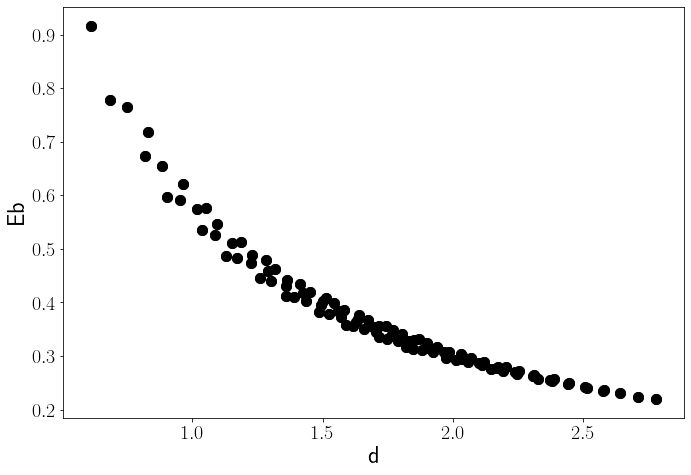

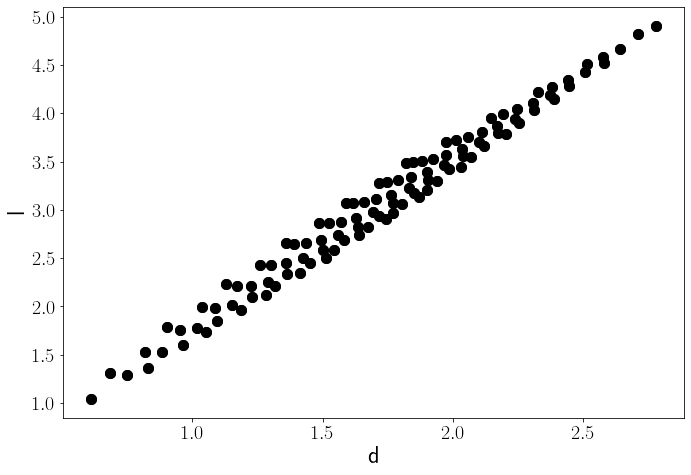

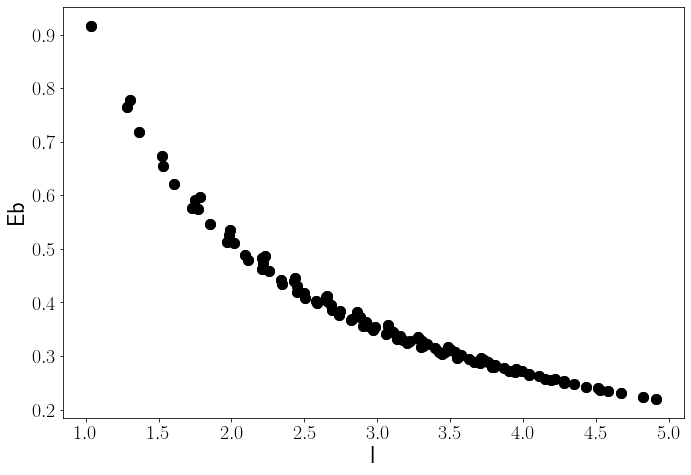

In [7]:
plt.figure()


for n in range(4, 22):
    for m in range(4,22):
        if (2*n+m) % 3 != 0:
            plt.plot(ntc_diam(n,m), Eb_CapazPRB2006(n, m), 'ko')
            
plt.ylabel('Eb')
plt.xlabel('d')
            
plt.figure()

for n in range(4, 22):
    for m in range(4,22):
        if (2*n+m) % 3 != 0:
            plt.plot(ntc_diam(n,m), Exciton_size_CapazPRB2006(n, m), 'ko')
            
plt.ylabel('l')
plt.xlabel('d')
            
plt.figure()

for n in range(4, 22):
    for m in range(4,22):
        if (2*n+m) % 3 != 0:
            plt.plot(Exciton_size_CapazPRB2006(n,m), Eb_CapazPRB2006(n, m), 'ko')

plt.ylabel('Eb')
plt.xlabel('l')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


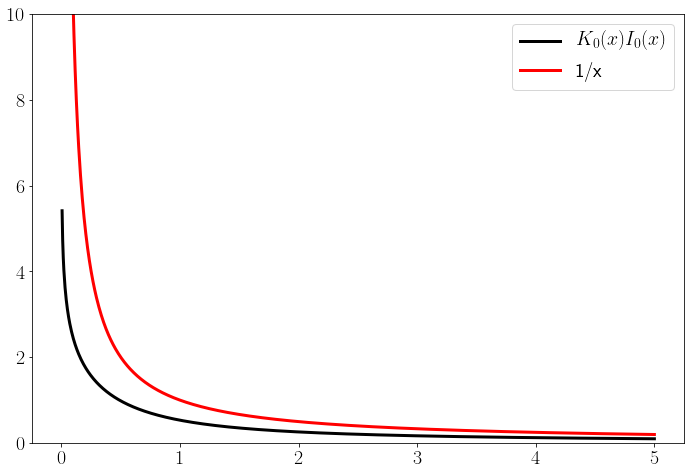

In [8]:

# screening - Nano Letters (2009) Deslippe et. al

from scipy.special import kn 
# Modified Bessel function of the second kind of integer order n
from scipy.special import iv
# Modified Bessel function of the first kind of real order.


def Vbare(q, d):
    return 2*kn(0, q*d/2)*iv(0, q*d/2)

plt.figure()

x = np.linspace(0, 5, 1000)
plt.plot(x, kn(0, x)*iv(0, x), 'k', label='$K_0(x)I_0(x)$')  
plt.plot(x, 1/x, 'r', label='1/x')

plt.ylim([0, 10])

plt.legend()


[15.29017276  0.63622609]


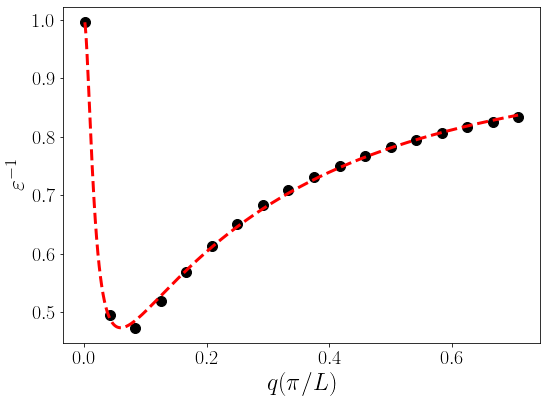

In [9]:
# screening - Nano Letters (2009) Deslippe et. al

d = ntc_diam(10, 0)

def chi_deslippe(q, C1, C2):
    return -C2*d**2*C1*q**2/(1 + C1*q**2)

def inveps_deslippe(q, C1, C2):
    return (1 - chi_deslippe(q, C1, C2)*Vbare(q, d) )**(-1) 

data_inveps_10_0 = '/home/rafael/Dropbox/0-Work/0-Projects/Excitons_CNTs/cnt_10_0/pure/GWbse_ptsK_24co_192fi/5-epsilon/inv_eps_data'

# ab initio data
Q_ref, inveps_ref = [], []
L = 0.42 # nm
q0 = np.pi/L

arq = open(data_inveps_10_0)

for line in arq:
    linha = line.split()
    Q_ref.append(float(linha[0])*q0)
    inveps_ref.append(float(linha[1]))
    
qplot = np.arange(min(Q_ref), max(Q_ref), max(Q_ref)/1000)
popt, pcov = curve_fit(inveps_deslippe, Q_ref, inveps_ref)

plt.figure(figsize=(8,6))

N = q0

plt.plot(np.array(Q_ref)/N, inveps_ref, 'ko')
plt.plot(qplot/N, inveps_deslippe(qplot, *popt), 'r--')

plt.ylabel(r'$\varepsilon^{-1}$')
plt.xlabel(r'$q (\pi / L)$')

print(popt)
C1, C2 = popt

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


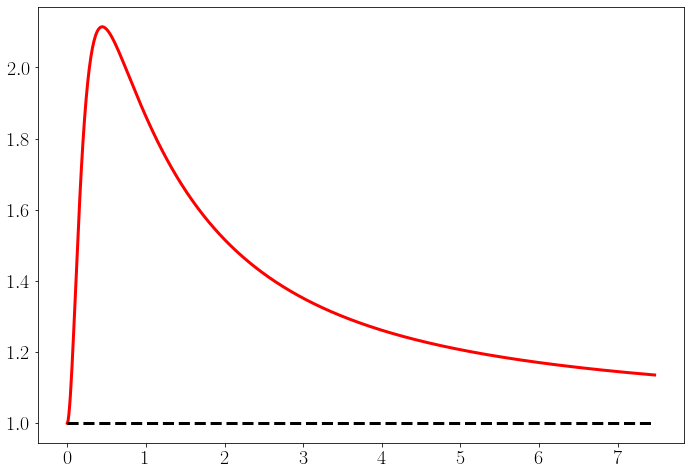

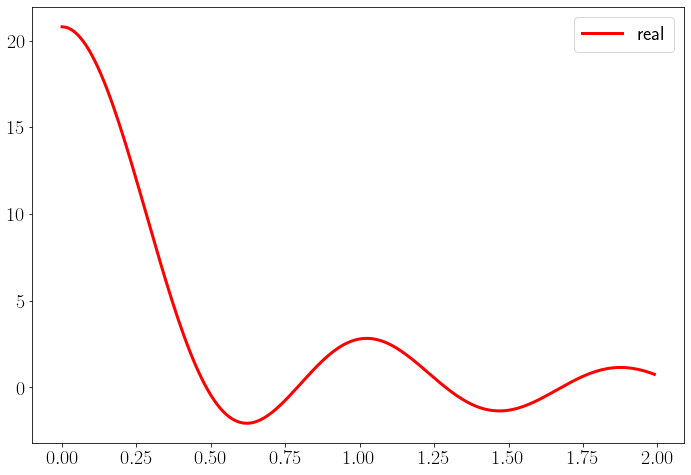

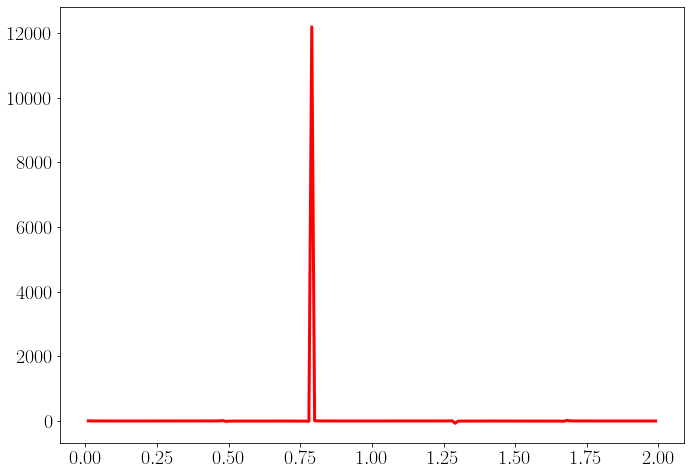

In [10]:
# transformada de fourier de epsilon eps(r) = int eps(q)*exp(j*q*r)
R = np.arange(0, 2, 0.01)


dq = 0.01
qmax = np.pi/L
qFourier = np.arange(1e-5, qmax, dq)
EPS = 1/inveps_deslippe(qFourier, C1, C2)

plt.figure()
plt.plot(qFourier, EPS, 'r-')
plt.plot(qFourier, [1]*len(qFourier), 'k--')

def Fourier(r):
    #return 2*sum(EPS*np.exp(1.0j*qFourier*r))*dq
    return 2*sum(EPS*np.cos(qFourier*r))*dq

EPS_r = []
for i in range(len(R)):
    EPS_r.append(Fourier(R[i]))
EPS_r = np.array(EPS_r)
    
plt.figure()
plt.plot(R, EPS_r.real, 'r-', label='real')
#plt.plot(R, EPS_r.imag, 'b-', label='imag')
plt.legend()

plt.figure()
plt.plot(R, 1/EPS_r.real*(1/R), 'r-', label='real')

    


In [12]:
# zh e ze medidos em nm

alpha = 1.4399497301900483 # eV.nm -> valor de e^2/4pi*eps0*z para r=1nm
beta = 0.01904984875971439 # eV.nm^2 -> valor de hbar^2/(4*m_e0*l0^2), onde m_e0 eh a massa de repouso do eletron
                           # e l0 = 1nm - energia cinética do pacote gaussiano eh hbar/(4*mu*l0^2)
delta = 0.21 # distancia entre picos - metade do parametro de rede do ntc pristine
    
mu = 0.5 # Massa reduzida supondo massa efetivas me = mh = massa de repouso do eletron
U = 11.3 # eV


def energia_cinetica_exciton0(l0, beta, mu):
    return beta/(l0**2*mu)   # mu = massa reduzida em unidades da massa de repouso do eletron (9.109e-31 kg)

def energia_cinetica_exciton1(l0, beta, mu):
    x = (l0/delta)**2
    correcao = 1 + 8*np.pi**2*x/(1 + np.exp(-4*np.pi**2*x))
    return correcao*beta/(l0**2*mu)   # mu = massa reduzida em unidades da massa de repouso do eletron (9.109e-31 kg)

def Ohno_e_h(alpha, U, z):
    return -U/np.sqrt(1 + (abs(z)*U/alpha)**2 )

def Ohno2_e_h(alpha, U, z, R, theta):
    r = np.sqrt(z**2 + 4 * np.pi * (R*np.sin(theta/2))**2 )
    return -U/np.sqrt(1 + (r*U/alpha)**2 )

# parte radial

def exciton0(z, l0):
    N = np.sqrt(l0)*(np.pi)**(0.25)   # normalizacao
    return (1/N)*np.exp(-z**2/(2*l0**2))

def exciton1(z, l0):
    N = np.sqrt(l0*np.sqrt(np.pi)/2*(1 + np.exp(-4*l0**2*np.pi**2/delta**2) ) )   # normalizacao
    return (1/N)*np.exp(-z**2/(2*l0**2))*np.cos(2*np.pi*z/delta)

def exciton_imp(z, l0, Zcm, lcm):  # localizado na origem!
    N = np.sqrt(l0)*(np.pi)**(0.25)   # normalizacao
    N2 = np.sqrt(lcm)*(np.pi)**(0.25)
    return (1/(N*N2))*np.exp(-z**2/(2*l0**2))*np.exp(-Zcm**2/(2*lcm**2))
                                 
# parte angular
                                                
def parte_angular(theta, theta0, mu):
    return np.exp(-theta**2/(2*theta0**2))*np.cos(2*np.pi*mu*theta)

In [5]:

dz = 0.01
zrange = np.arange(-50, 50, dz)
U = 4

def Pot(l0, U):
    return sum(Ohno_e_h(alpha, U, zrange)*exciton0(zrange, l0)**2*dz)

L0 = np.arange(dz, 8, dz)
PotEng = []

for l0 in L0:
    PotEng.append(Pot(l0, U))
    
PotEng = np.array(PotEng)

0.34 -3.149912757373621


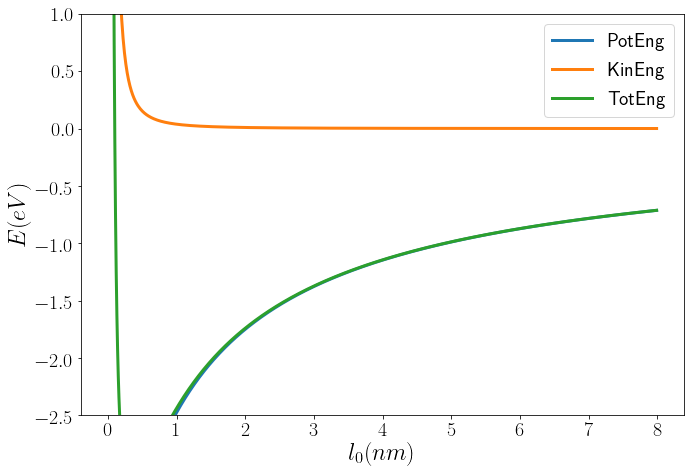

In [6]:
plt.figure()

mu = 0.5

KinEng = energia_cinetica_exciton0(L0, beta, mu)
#KinEng2 = energia_cinetica_exciton1(L0, beta, mu)

plt.plot(L0, PotEng, label='PotEng')
plt.plot(L0, KinEng, label='KinEng')
#plt.plot(L0, KinEng2, label='KinEng2')
TotEng = KinEng + PotEng
#TotEng2 = KinEng2 + PotEng
plt.plot(L0, TotEng, label='TotEng')
#plt.plot(L0, TotEng2, label='TotEng2')

plt.xlabel(r'$l_0 (nm)$')
plt.ylabel(r'$E (eV)$')
plt.legend()
plt.ylim([-2.5, 1])

Eb_min = min(TotEng)
minIndex = list(TotEng).index(Eb_min)
l0_min = L0[minIndex]


print(l0_min, Eb_min)

In [7]:
Urange = np.arange(0.01, 3, 0.05)

KinEng = energia_cinetica_exciton0(L0, beta, mu)

L_opt, Eb_opt = [], []

for U in Urange:
    
    PotEng = []

    for l0 in L0:
        PotEng.append(Pot(l0, U))
        
    PotEng = np.array(PotEng)
    
    TotEng = KinEng + PotEng
    
    Eb_min = min(TotEng)
    minIndex = list(TotEng).index(Eb_min)
    l0_min = L0[minIndex]
    
    Eb_opt.append(-Eb_min)
    L_opt.append(l0_min)
    
    

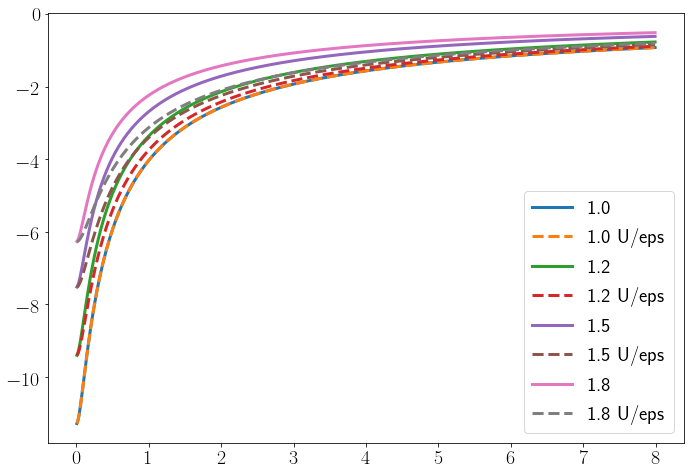

In [8]:
U = 11.3

EPS = [1.0, 1.2, 1.5, 1.8]

for eps in EPS:
    
    PotEng, PotEng2 = [], []

    for l0 in L0:
        PotEng.append(Pot(l0, U)/eps)
        PotEng2.append(Pot(l0, U/eps))
        
    PotEng = np.array(PotEng)
    
    plt.plot(L0, PotEng, label=str(eps))
    plt.plot(L0, PotEng2, '--', label=str(eps)+' U/eps')
    
plt.legend()

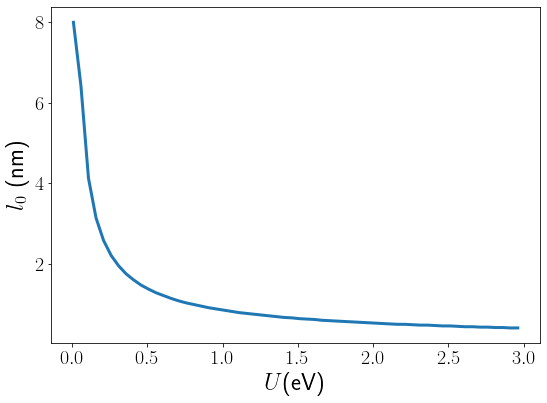

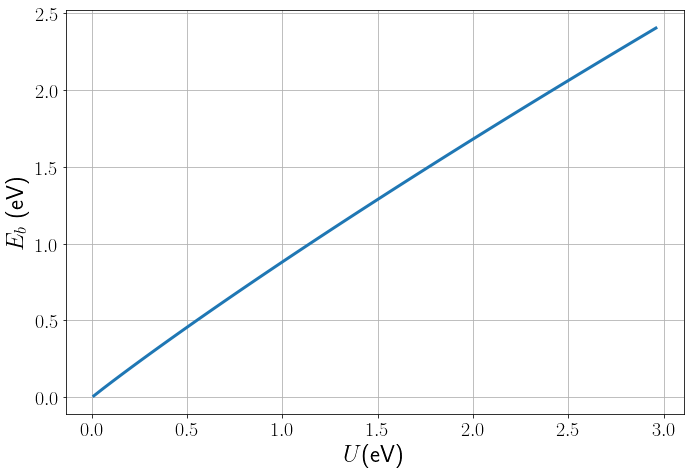

In [9]:
plt.figure(figsize=(8,6))

plt.plot(Urange, L_opt)
plt.xlabel(r'$U$(eV)')
plt.ylabel(r'$l_0$ (nm)')

plt.figure()
plt.plot(Urange, Eb_opt)
plt.xlabel(r'$U$(eV)')
plt.ylabel(r'$E_b$ (eV)')

plt.grid()

#plt.ylim([1, 1.4])
#plt.xlim([0.5, 1])
#plt.grid()

In [10]:
Exciton_size_CapazPRB2006(10,0)

1.2527983719358997

(0, 2.5)

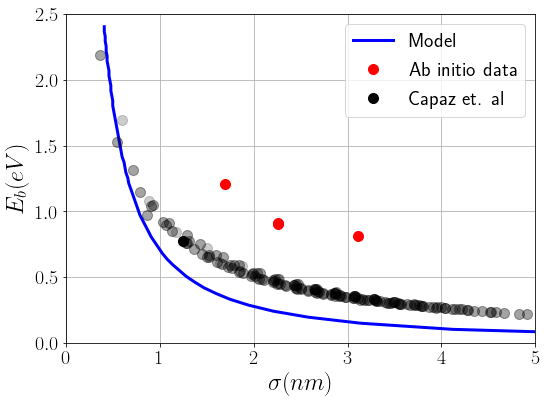

In [11]:
plt.figure(figsize=(8,6))
#plt.plot(np.array(Lopt), -np.array(Eopt), 'b')
#plt.plot([l0_min], [-Eb_min], 'go')
plt.plot(np.array(L_opt), np.array(Eb_opt), 'b', label='Model')
plt.plot(np.array(L_BGW)/np.sqrt(2), Eb_BGW, 'ro', label='Ab initio data')

for n in range(1, 22):
    for m in range(0,22):
        if (2*n+m) % 3 != 0:
            plt.plot(Exciton_size_CapazPRB2006(n,m), Eb_CapazPRB2006(n, m), 'ko', alpha=0.2)

n, m = 10, 0            
plt.plot(Exciton_size_CapazPRB2006(n,m), Eb_CapazPRB2006(n, m), 'ko', alpha=1, label='Capaz et. al')

plt.legend()
plt.xlabel(r'$\sigma (nm)$')
plt.ylabel(r'$E_b (eV)$')

plt.grid()
plt.xlim([0, 5])
plt.ylim([0, 2.5])

In [41]:
def U_e(z, Qeff, ZI, Zcm):
    Utemp = Ohno_e_h(alpha, 0,  z)  # criando array de 0 kkkkkk
    for zi in ZI:
        Utemp += Qeff*Ohno_e_h(alpha, U,  z*mh/M + Zcm - zi)
    return Utemp

def U_h(z, Qeff, ZI, Zcm):
    Utemp = Ohno_e_h(alpha, 0,  z)  # criando array de 0 kkkkkk
    for zi in ZI:
        Utemp += -Qeff*Ohno_e_h(alpha, U,  -z*me/M + Zcm - zi)
    return Utemp

def U_Tot(z, Qeff, ZI, Zcm):
    Utemp = Ohno_e_h(alpha, U,  z)
    for zi in ZI:
        Utemp += Qeff*Ohno_e_h(alpha, U,  z*mh/M + Zcm - zi)
        Utemp += -Qeff*Ohno_e_h(alpha, U,  -z*me/M + Zcm - zi)
    return Utemp

def Pot2(l0, U):
    return sum(U_Tot(z, Qeff, ZI, Zcm)*exciton0(z, l0)**2*dz)

def Pot_ExImp(l0, lcm, U, Zcm):
    return sum(U_Tot(z, Qeff, ZI, Zcm)*exciton_imp(z, l0, Zcm, lcm)**2*dz)

1.5000000000000002 -0.5257332569541481


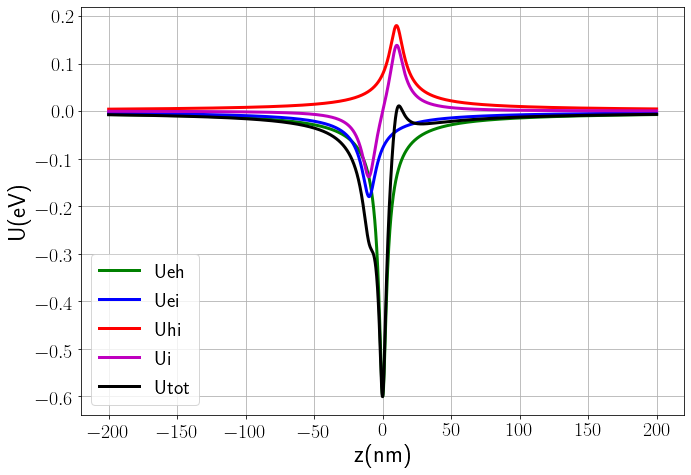

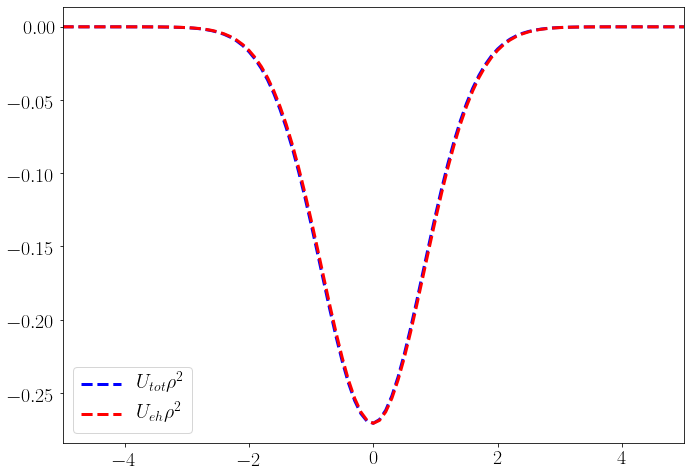

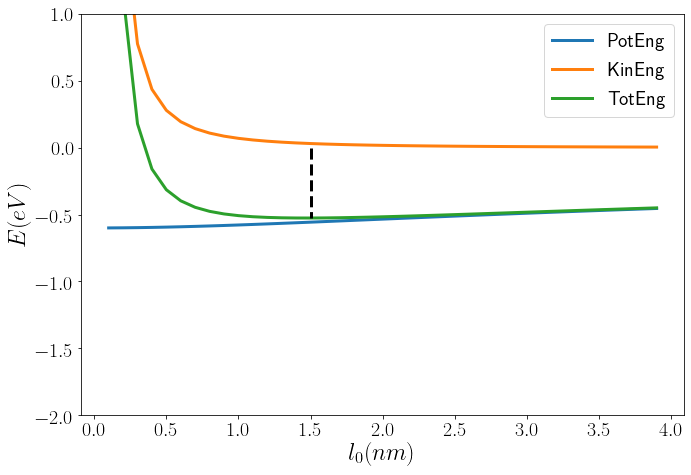

In [36]:
# teste

U = 0.6
l0 = 1.25

#me, mh = 0.6, 0.6
mh = 0.14776191224670518
me = 0.14625192772902104
M = me + mh
Qeff = 0.3

Zcm = 5
dz = 1e-1
Zmax = 200
z = np.arange(-Zmax, Zmax, dz)

ZI = []
latt = 0.42*4
Ncells = int(Zmax/latt) + 1
for i in range(-Ncells, Ncells + 1):
    ZI.append(latt*i)

ZI = [0]
Ueh = Ohno_e_h(alpha, U,  z)
    
Ue = U_e(z, Qeff, ZI, Zcm)
Uh = U_h(z, Qeff, ZI, Zcm)

#Ue = Ohno_e_h(alpha, U,  -z*me/M + Zcm - zi)
#Uh = -Qeff*Ohno_e_h(alpha, U,  -z*me/M + Zcm - zi)

plt.plot(z, Ueh, 'g', label='Ueh')
plt.plot(z, Ue, 'b', label='Uei')
plt.plot(z, Uh, 'r', label='Uhi')
plt.plot(z, Ue+Uh, 'm-', label='Ui')
plt.plot(z, Ue+Uh+Ueh, 'k-', label='Utot')
#plt.plot(z, UpopTot(z, Qeff, ZI, Zcm), 'k-', label='sum')

plt.xlabel('z(nm)')
plt.ylabel('U(eV)')

plt.legend()
plt.grid()

plt.figure()
plt.plot(z, (Ue+Uh+Ueh)*exciton0(z, l0)**2, 'b--', label=r'$U_{tot} \rho^2$')
plt.plot(z, Ueh*exciton0(z, l0)**2, 'r--', label=r'$U_{eh} \rho^2$')
plt.legend()
plt.xlim([-5, 5])

L0 = np.arange(dz, 4, dz)
KinEng = energia_cinetica_exciton0(L0, beta, mu)

POT2 = []
for i in range(len(L0)):
    POT2.append(Pot2(L0[i], U))
POT2 = np.array(POT2)


plt.figure()
plt.plot(L0, POT2, label='PotEng')
plt.plot(L0, KinEng, label='KinEng')
TotEng = KinEng + POT2
plt.plot(L0, TotEng, label='TotEng')

plt.xlabel(r'$l_0 (nm)$')
plt.ylabel(r'$E (eV)$')
plt.legend()
plt.ylim([-2, 1])

Eb_min = min(TotEng)
minIndex = list(TotEng).index(Eb_min)
l0_min = L0[minIndex]


print(l0_min, Eb_min)

plt.plot([l0_min, l0_min], [0, Eb_min], 'k--')


[] []


Text(0, 0.5, '$E_b (eV)$')

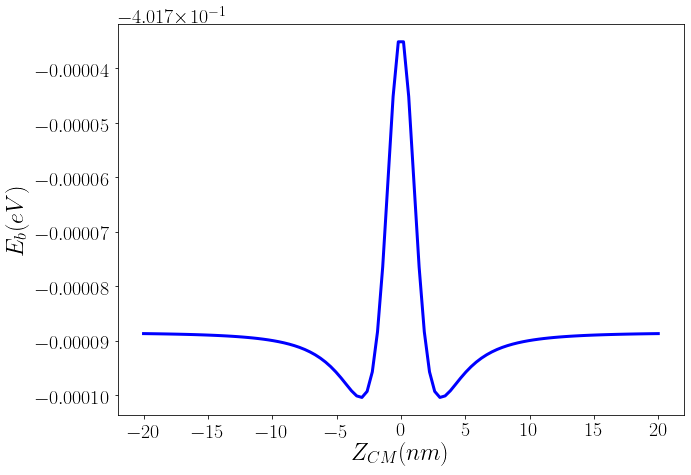

In [33]:
# Um defeito na origem

U = 0.6
l0 = 1.25

LOPT, EBOPT = [], []
EBOPT2 = []


mu = me*mh/(me+mh)
M = me + mh
Qeff = 0.3

Zcm = 0
dz = 1e-1
Zmax = 200
z = np.arange(-Zmax, Zmax, dz)

ZI = [0.0]

Ueh = Ohno_e_h(alpha, U,  z)

ZCM = [-3, -2, -1, 0, 1, 2, 3]
ZCM = [-2, 0, 2]
ZCM = np.linspace(-20, 20, 100)

PLOTTRUE = False
if len(ZCM) <= 20:
    PLOTTRUE = True

if PLOTTRUE is True:
    plt.figure()

for Zcm in ZCM:
    Ue = U_e(z, Qeff, ZI, Zcm)
    Uh = U_h(z, Qeff, ZI, Zcm)
    
    if PLOTTRUE is True:
        plt.plot(z, Ue+Uh+Ueh, label='Zcm='+str(Zcm))

        plt.xlabel('z(nm)')
        plt.ylabel('U(eV)')

        plt.legend()
        plt.grid()

#    POT2 = []
#    for i in range(len(L0)):
#        POT2.append(Pot2(L0[i], U))
#    POT2 = np.array(POT2)


#    TotEng = KinEng + POT2

#    Eb_min = min(TotEng)
#    minIndex = list(TotEng).index(Eb_min)
#    l0_min = L0[minIndex]

#    LOPT.append(l0_min)
#    EBOPT.append(Eb_min)
    
    TotEng2 = energia_cinetica_exciton0(l0, beta, mu) + Pot2(l0, U)
    EBOPT2.append(TotEng2)

#    print(Zcm, l0_min, Eb_min)

print(LOPT, EBOPT)    
plt.figure()
#plt.plot(ZCM, EBOPT, 'ro')
#plt.plot(ZCM, EBOPT, 'r-')

#plt.plot(ZCM, EBOPT2, 'bo')
plt.plot(ZCM, EBOPT2, 'b-')
plt.xlabel(r'$Z_{CM}(nm)$')
plt.ylabel(r'$E_b (eV)$')

[] []


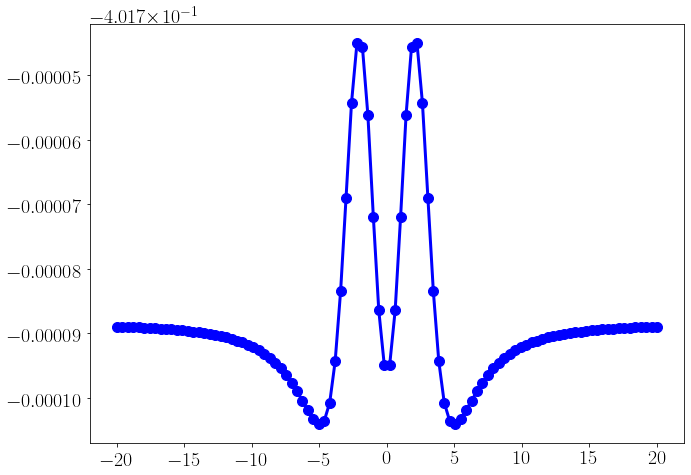

In [34]:
# dois defeitos na origem

U = 0.6
l0 = 1.25

LOPT, EBOPT = [], []
EBOPT2 = []


mu = me*mh/(me+mh)
M = me + mh
Qeff = 0.3

Zcm = 0
dz = 1e-1
Zmax = 200
z = np.arange(-Zmax, Zmax, dz)

ZI = [-2, 2]

Ueh = Ohno_e_h(alpha, U,  z)

ZCM = [-3, -2, -1, 0, 1, 2, 3]
ZCM = [-1, 0, 1]
ZCM = np.linspace(-20, 20, 100)

PLOTTRUE = False
if len(ZCM) <= 20:
    PLOTTRUE = True

if PLOTTRUE is True:
    plt.figure()

for Zcm in ZCM:
    Ue = U_e(z, Qeff, ZI, Zcm)
    Uh = U_h(z, Qeff, ZI, Zcm)
    
    if PLOTTRUE is True:
        plt.plot(z, Ue+Uh+Ueh, label='Zcm='+str(Zcm))

        plt.xlabel('z(nm)')
        plt.ylabel('U(eV)')

        plt.legend()
        plt.grid()

#    POT2 = []
#    for i in range(len(L0)):
#        POT2.append(Pot2(L0[i], U))
#    POT2 = np.array(POT2)


#    TotEng = KinEng + POT2

#    Eb_min = min(TotEng)
#    minIndex = list(TotEng).index(Eb_min)
#    l0_min = L0[minIndex]

#    LOPT.append(l0_min)
#    EBOPT.append(Eb_min)
    
    TotEng2 = energia_cinetica_exciton0(l0, beta, mu) + Pot2(l0, U)
    EBOPT2.append(TotEng2)

#    print(Zcm, l0_min, Eb_min)

print(LOPT, EBOPT)    
plt.figure()
#plt.plot(ZCM, EBOPT, 'ro')
#plt.plot(ZCM, EBOPT, 'r-')

plt.plot(ZCM, EBOPT2, 'bo')
plt.plot(ZCM, EBOPT2, 'b-')

[] []
[] []
[] []
[] []
[] []


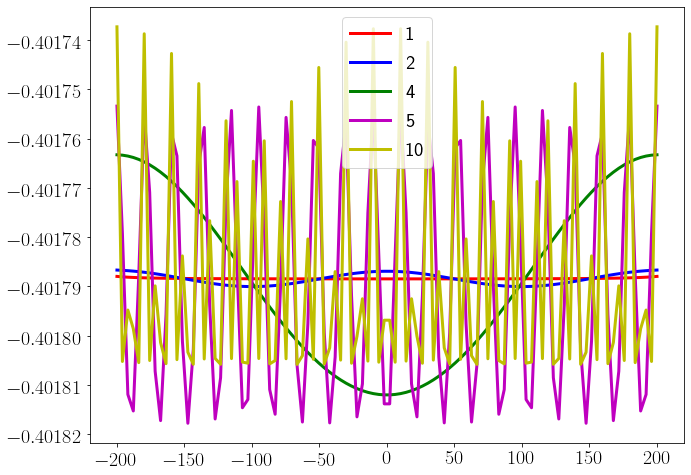

In [37]:
# rede de defeitos

U = 0.6
l0 = 1.25

LOPT, EBOPT = [], []
EBOPT2 = []

#me, mh = 0.6, 0.5
mu = me*mh/(me+mh)
M = me + mh
Qeff = 0.3

Zcm = 0
dz = 1e-1
Zmax = 200
ZCM = np.linspace(-Zmax, Zmax, 100)

z = np.arange(-1.5*Zmax, 1.5*Zmax, dz)
Ueh = Ohno_e_h(alpha, U,  z)

cores = ['r', 'b', 'g', 'm', 'y', 'k']
contador = 0

LATT = [1, 2, 4, 5, 10]
for latt in LATT:
    
    EBOPT2 = []

    ZI = []
    Ncells = int(1.2*Zmax/latt)
    for i in range(-Ncells, Ncells + 1):
        ZI.append(latt*i)



    for Zcm in ZCM:
        Ue = U_e(z, Qeff, ZI, Zcm)
        Uh = U_h(z, Qeff, ZI, Zcm)

        TotEng2 = energia_cinetica_exciton0(l0, beta, mu) + Pot2(l0, U)
        EBOPT2.append(TotEng2)

    print(LOPT, EBOPT)    

    cor = cores[contador]
    contador += 1
    plt.plot(ZCM, EBOPT2, '-', color=cor, label=str(latt))
    
plt.legend()

Text(0, 0.5, '$E_b (eV)$')

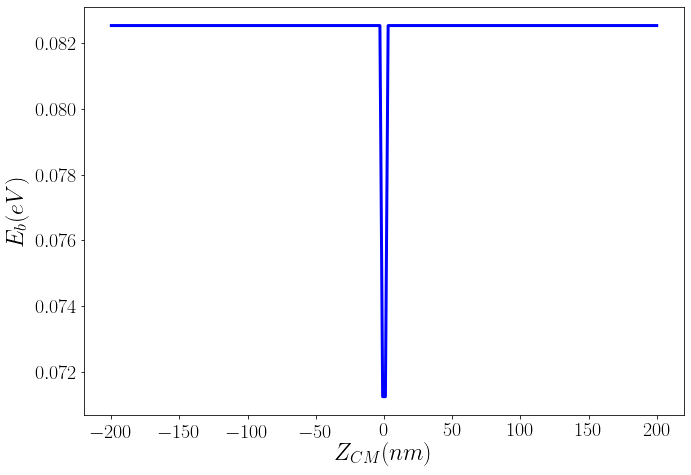

In [53]:

lcm = 0.8
# Um defeito na origem

U = 0.6
l0 = 1.25

LOPT, EBOPT = [], []
EBOPT2 = []

mh = 0.14776191224670518
me = 1000 #0.14625192772902104
mu = me*mh/(me+mh)
M = me + mh
Qeff = 0.3

Zcm = 0
dz = 1e-1
Zmax = 200
z = np.arange(-Zmax, Zmax, dz)

ZI = [0.0]

ZI = []
latt = 1
Ncells = int(1.2*Zmax/latt)
for i in range(-Ncells, Ncells + 1):
    ZI.append(latt*i)

Ueh = Ohno_e_h(alpha, U,  z)

ZCM = [-3, -2, -1, 0, 1, 2, 3]
ZCM = [-2, 0, 2]
ZCM = np.linspace(-Zmax, Zmax, 200)


for Zcm in ZCM:
    Ue = U_e(z, Qeff, ZI, Zcm)
    Uh = U_h(z, Qeff, ZI, Zcm)
    
    TotEng2 = energia_cinetica_exciton0(l0, beta, mu) + Pot_ExImp(l0, lcm, U, Zcm)
    EBOPT2.append(TotEng2)

#    print(Zcm, l0_min, Eb_min)

plt.figure()
#plt.plot(ZCM, EBOPT, 'ro')
#plt.plot(ZCM, EBOPT, 'r-')

#plt.plot(ZCM, EBOPT2, 'bo')
plt.plot(ZCM, EBOPT2, 'b-')
plt.xlabel(r'$Z_{CM}(nm)$')
plt.ylabel(r'$E_b (eV)$')


In [13]:
jupyter qtconsole

SyntaxError: invalid syntax (<ipython-input-13-321b99e027c4>, line 1)